In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install mediapipe

In [ ]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron

import numpy as np
import pandas as pd
import os
import tensorflow as tf

In [ ]:
f_folder_path = '/content/drive/MyDrive/광인사 팀프로젝트/기업 프로젝트_여보야/24 mediapipe 이미지 데이터/m'
f_folder = os.listdir(f_folder_path)

In [ ]:
# 이미지 좌표 점 잘 찍히는지 판단하기 위한 코드
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

count = 0
for file in f_folder: #file = 50장 이미지 바로 접근
    #이미지 좌표 찍기 
    face = []
    image = cv2.imread(f_folder_path + '/' + file)

    height, width, _ = image.shape
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    result = face_mesh.process(rgb_image)
    
    for facial_landmarks in result.multi_face_landmarks:
        for i in range(0, 468):
            pt = facial_landmarks.landmark[i]
            x = int(pt.x * width)
            y = int(pt.y * height)

            cv2.circle(image, (x, y), 3, (100, 100, 0), -1)

    #cv2_imshow(image)

    #데이터 프레임 생성
    temp = ['class']
    for i in range(1,469):
        temp += ['x{}'.format(i), 'y{}'.format(i), 'z{}'.format(i)]

    for facial_landmarks in result.multi_face_landmarks:
        for i in range(0,468):
            pt = facial_landmarks.landmark[i]
            x = pt.x
            y = pt.y
            z = pt.z
            face += [x,y,z]

    df = pd.DataFrame([[file.split('_')[0]] + list(np.array([face]).flatten())])
    df.columns = temp

In [ ]:
#데이터 프레임에 추가
for a in range(len(f_folder)):
    k = f_folder[a]
    face = []
    image = cv2.imread(f_folder_path+"/"+k)
    height, width, _ = image.shape

    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    result = face_mesh.process(rgb_image)
    
    for facial_landmarks in result.multi_face_landmarks:
        for i in range(0,468):
            pt = facial_landmarks.landmark[i]
            x = pt.x
            y = pt.y
            z = pt.z
            face += [x,y,z]

    df.loc[a] = [k.split('_')[0]] + list(np.array([face]).flatten())

In [ ]:
df.sort_values(by='class').columns

Index(['class', 'x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3',
       ...
       'z465', 'x466', 'y466', 'z466', 'x467', 'y467', 'z467', 'x468', 'y468',
       'z468'],
      dtype='object', length=1405)

In [ ]:
# train_data, test_data 나누기

df_x_data = df.drop(['class'], axis =1)
df_y_data = df['class']

df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(df_x_data, df_y_data,
                                                                test_size=0.3, 
                                                                random_state=777,
                                                                stratify=df_y_data)

print("train.shape :", df_x_train.shape)
print("test.shape :", df_x_test.shape)

train.shape : (35, 1404)
test.shape : (15, 1404)


In [ ]:
# 표준화하기
sc = StandardScaler() #preprocessing 모듈에서 StandardScaler 클래스를 로드
sc.fit(df_x_train) # 각 특성마다 샘플평균과 표준편차를 계산
x_train_std = sc.transform(df_x_train)
x_test_std = sc.transform(df_x_test)

In [ ]:
# 학습시키기
# eat0 : 학습률, max_iter = epoch
# random_state =1, epoch마다 훈련 세트를 섞은 결과가 나중에 재현되도록 
ppn = Perceptron(max_iter=40, eta0=0.1, tol=1e-3, random_state=1)
ppn.fit(x_train_std, df_y_train)

y_pred = ppn.predict(x_test_std)

print('잘못 분류된 샘플 개수 : %d' % (df_y_test != y_pred).sum())

잘못 분류된 샘플 개수 : 11


In [ ]:
# 정확도 확인
from sklearn.metrics import accuracy_score

print('정확도: %.2f' % accuracy_score(df_y_test, y_pred)) # 0.20
print('정확도: %.2f' % ppn.score(x_test_std, df_y_test)) # 0.2


정확도: 0.27
정확도: 0.27


모델 테스트

In [ ]:
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh()

In [ ]:
# 내 얼굴
image = cv2.imread("/content/drive/MyDrive/data/KakaoTalk_20211117_132105511.jpg")
height, width, _ = image.shape

rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

result = face_mesh.process(rgb_image)

In [ ]:
for facial_landmarks in result.multi_face_landmarks :
  for i in range(0,468) :
    pt = facial_landmarks.landmark[i]
    x = int(pt.x * width)
    y = int(pt.y * height)

    cv2.circle(image, (x, y), 3, (100, 100, 0), -1)
    # cv2.putText(image, str(i), (x,y), 0, 1, (0,0,0)) 

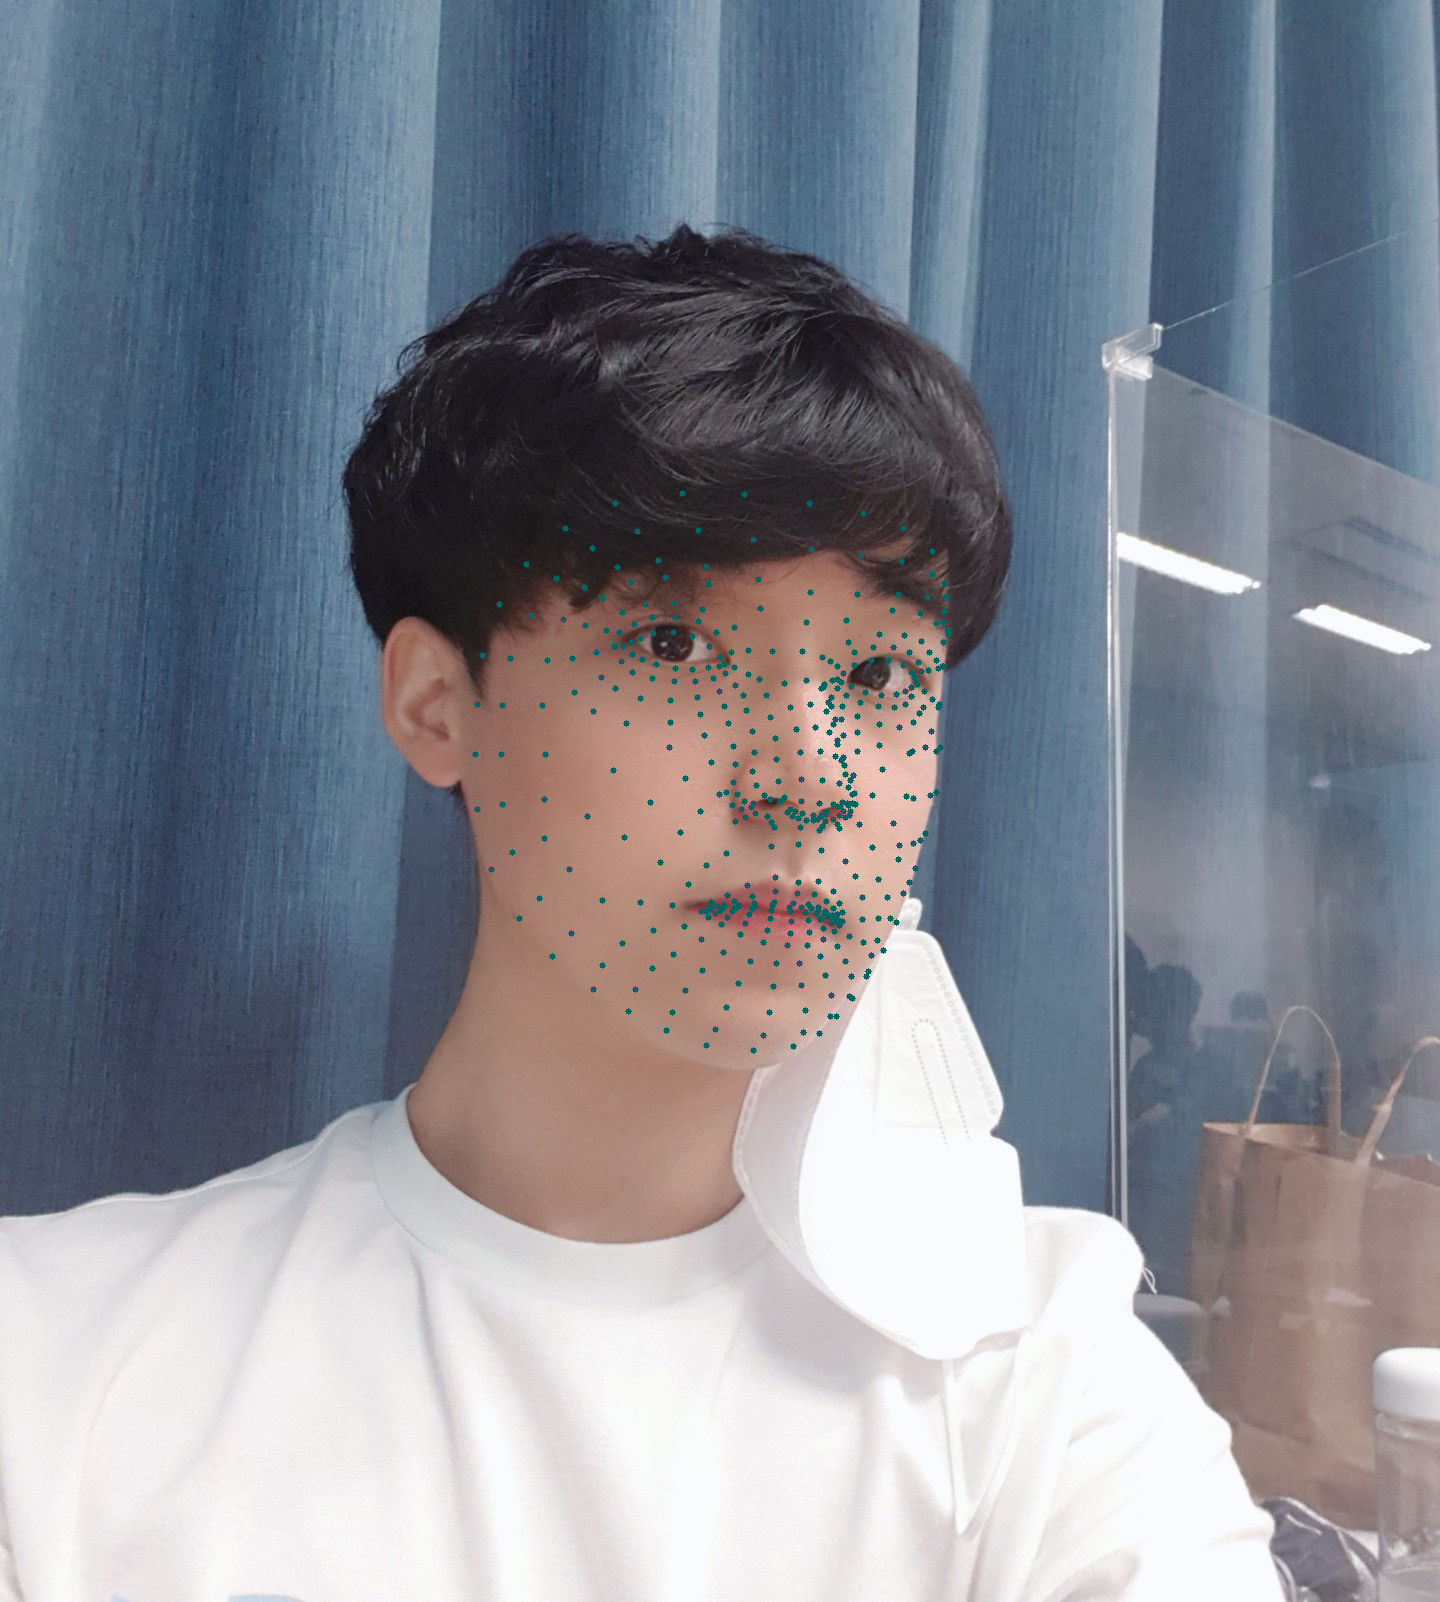

In [ ]:
cv2_imshow(image)

In [ ]:
face = []

for facial_landmarks  in result.multi_face_landmarks :
  for i in range(0,468) :
    pt = facial_landmarks.landmark[i]
    x = pt.x
    y = pt.y
    z = pt.z

    face += [x,y,z]

In [ ]:
df = pd.DataFrame([['whatanimal'] + list(np.array([face]).flatten())]) # []

temp = ['class']
for val in range(1, 469):
    temp += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val)]

df.columns = temp

In [ ]:
# 표준화
df_x_ex_data = df.drop(['class'], axis =1)
x_test_ex_std = sc.transform(df_x_ex_data)

In [ ]:
pred = ppn.predict(x_test_ex_std)
result = [np.argmax(value) for value in pred]
print('New data category : ', pred[result[0]])

New data category :  dino
